In [113]:
# importing required modules

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# reported cases since 24.02 up to 11.05 (Moscow)
cases = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 6, 6, 6, 9, 9, 
         15, 19, 24, 33, 33, 53, 56, 86, 98, 131, 137
         , 191, 262, 290, 410, 546, 703, 817, 1014, 1226,
         1613, 1880, 2475, 2923, 3357, 3893, 4484, 5181,
         5841, 6698, 7822, 8852, 10158, 11513, 13002, 14776,
         16146, 18105, 20754, 24324, 26350, 29433, 31981, 33940,
         36897, 39509, 42480, 45351, 48426, 50646, 53739, 57300, 
         62658, 68606, 74401, 80115, 85973, 92676, 98522, 104189, 109740, 115909]



# defining function describing the system
def f(y, t, beta):
    Xi = y[0] # susceptible
    Vi = y[1] # exposed
    Qi = y[2] # infectious
    Wi = y[3] # non-symptomatical
    Yi = y[4] # symptomatical (non-hospitalized)
    Ui = y[5] # hospitalized
    Zi = y[6] # removed
    Di = y[7] # dead
    f0 = -beta * Xi * Qi / N
    f1 = beta * Xi * Qi / N - (1 / sigma) * Vi
    f2 = (1 / sigma) * Vi - (1 / xi) * Qi - (1 / gamma) * (1 - 1 / xi) * Qi
    f3 = (1 / xi) * mu * Qi - (1 / lmbda) * Wi
    f4 = (1 / xi) * (1 - mu) * Qi - 0.87 * (1 / gamma) * Yi - 0.13 * (1 / eta) * Yi
    f5 = 0.13 * (1 / eta) * Yi - (1 / gamma) * Ui / (1 - rho)
    f6 = (1 / lmbda) * Wi + 0.87 * (1 / gamma) * Yi + (1 / gamma) * Ui * rho / (1 - rho)
    f7 = rho / (1 - rho) * (1 / gamma) * Ui
    return [f0, f1, f2, f3, f4, f5, f6, f7]

In [114]:
# defining known parameters

sigma = 5.1 # mean incubation period
eta = 3.5 # avg time between symptoms and hospitalization
delta = 14.68 # avg time between hospitalization and death
gamma = 11.36 # avg curation time (with symptoms)
lmbda = 11.36 # avg curation time (no symptoms)
mu = 0.88 # amount of non-symptom cases
xi = 3 # mean time between end of incub. period and detection of a virus
rho = 0.0129 # proba of death

N = 12537954 # Moscow population

# to fit: beta (transmission rate)

In [115]:
# сделаем следующее предположение:
# в период до 15 апреля beta ведёт себя как линейная функция от времени
# начиная с 15 апреля beta константна в связи с введением мер самоизоляции

In [116]:
# определим функцию квадратичной ошибки 

from functools import partial

def error(a, b, y0, n1, n2):
    error = 0
    best_beta = None
    for i in range(n1, n2):
        beta = a * i + b
        f2 = partial(f, beta=beta)
        t = np.linspace(i, i + 1, 70)
        soln = odeint(f2, y0, t)
        X = soln[:, 0]
        V = soln[:, 1]
        Q = soln[:, 2]
        W = soln[:, 3]
        Y = soln[:, 4]
        U = soln[:, 5]
        Z = soln[:, 6]
        D = soln[:, 7]
        to_sum = W[69] + Y[69] + U[69] + Z[69] + D[69] - cases[i]
        error += to_sum * to_sum
        y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]
    return error

In [117]:
# подберём beta для первого промежутка

a_step = 0.00001
b_step = 0.001
min_b = 1.35
max_b = 1.51
max_a = -0.0145
min_a = -0.0165
best_error = 10e12
best_params = None
a = min_a
while (a <= max_a):
    b = min_b
    while (b <= max_b):
        y0 = [N - 1, 0, 1, 0, 0, 0, 0, 0]
        new_err = error(a, b, y0, 0, 54)
        if new_err < best_error:
            best_error = new_err
            best_params = [a, b]
        b += b_step
    print("a = {} done".format(a))
    a += a_step

a = -0.0165 done
a = -0.01649 done
a = -0.01648 done
a = -0.016470000000000002 done
a = -0.016460000000000002 done
a = -0.016450000000000003 done
a = -0.016440000000000003 done
a = -0.016430000000000004 done
a = -0.016420000000000004 done
a = -0.016410000000000004 done
a = -0.016400000000000005 done
a = -0.016390000000000005 done
a = -0.016380000000000006 done
a = -0.016370000000000006 done
a = -0.016360000000000006 done
a = -0.016350000000000007 done
a = -0.016340000000000007 done
a = -0.016330000000000008 done
a = -0.016320000000000008 done
a = -0.01631000000000001 done
a = -0.01630000000000001 done
a = -0.01629000000000001 done
a = -0.01628000000000001 done
a = -0.01627000000000001 done
a = -0.01626000000000001 done
a = -0.01625000000000001 done
a = -0.01624000000000001 done
a = -0.016230000000000012 done
a = -0.016220000000000012 done
a = -0.016210000000000013 done
a = -0.016200000000000013 done
a = -0.016190000000000013 done
a = -0.016180000000000014 done
a = -0.016170000000000014

In [118]:
print("First period\nbest parameters: a = {}, b = {}".format(best_params[0], best_params[1]))

First period
best parameters: a = -0.01600000000000002, b = 1.5089999999999826


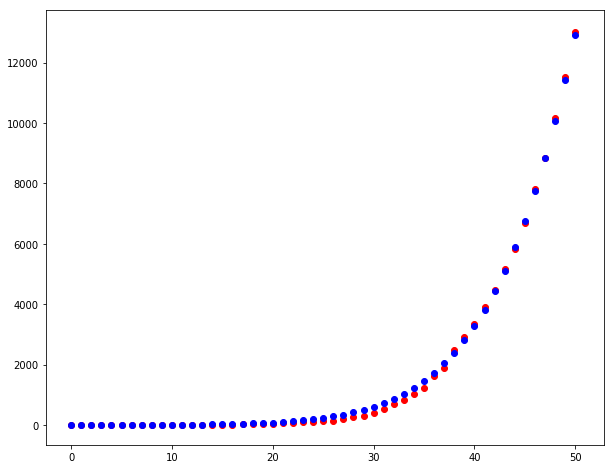

In [119]:
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8

y0 = [N - 1, 0, 1, 0, 0, 0, 0, 0]
for i in range(51):
    xi = 3
    beta = -0.016 * i +  1.509
    f2 = partial(f, beta=beta)
    t = np.linspace(i, i + 1, 70)
    soln = odeint(f2, y0, t)
    X = soln[:, 0]
    V = soln[:, 1]
    Q = soln[:, 2]
    W = soln[:, 3]
    Y = soln[:, 4]
    U = soln[:, 5]
    Z = soln[:, 6]
    D = soln[:, 7]
    y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]
    plt.scatter(i, cases[i], color='red')
    plt.scatter(i, W[69] + Y[69] + U[69] + Z[69] + D[69], color='blue')

In [120]:
# теперь зафитим beta = const для промежутка с 31 марта

y_51 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]

def error_const(с, y0, n1, n2):
    error = 0
    best_beta = None
    for i in range(n1, n2):
        f2 = partial(f, beta=с)
        t = np.linspace(i, i + 1, 70)
        soln = odeint(f2, y0, t)
        X = soln[:, 0]
        V = soln[:, 1]
        Q = soln[:, 2]
        W = soln[:, 3]
        Y = soln[:, 4]
        U = soln[:, 5]
        Z = soln[:, 6]
        D = soln[:, 7]
        to_sum = W[69] + Y[69] + U[69] + Z[69] + D[69] - cases[i]
        error += to_sum * to_sum
        y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]
    return error

c_step = 0.0001
max_c = 0.8
min_c = 0.2
best_error = 10e12
best_const = None
c = min_c

while (c <= max_c):
    y0 = y_51
    new_err = error_const(c, y0, 51, len(cases))
    if new_err < best_error:
        best_error = new_err
        best_const = c
    print("c = {} done".format(c))
    c += c_step

c = 0.2 done
c = 0.2001 done
c = 0.2002 done
c = 0.20029999999999998 done
c = 0.20039999999999997 done
c = 0.20049999999999996 done
c = 0.20059999999999995 done
c = 0.20069999999999993 done
c = 0.20079999999999992 done
c = 0.2008999999999999 done
c = 0.2009999999999999 done
c = 0.2010999999999999 done
c = 0.20119999999999988 done
c = 0.20129999999999987 done
c = 0.20139999999999986 done
c = 0.20149999999999985 done
c = 0.20159999999999983 done
c = 0.20169999999999982 done
c = 0.2017999999999998 done
c = 0.2018999999999998 done
c = 0.2019999999999998 done
c = 0.20209999999999978 done
c = 0.20219999999999977 done
c = 0.20229999999999976 done
c = 0.20239999999999975 done
c = 0.20249999999999974 done
c = 0.20259999999999972 done
c = 0.2026999999999997 done
c = 0.2027999999999997 done
c = 0.2028999999999997 done
c = 0.20299999999999968 done
c = 0.20309999999999967 done
c = 0.20319999999999966 done
c = 0.20329999999999965 done
c = 0.20339999999999964 done
c = 0.20349999999999963 done
c = 0.2

c = 0.22949999999999676 done
c = 0.22959999999999675 done
c = 0.22969999999999674 done
c = 0.22979999999999673 done
c = 0.22989999999999672 done
c = 0.2299999999999967 done
c = 0.2300999999999967 done
c = 0.23019999999999669 done
c = 0.23029999999999667 done
c = 0.23039999999999666 done
c = 0.23049999999999665 done
c = 0.23059999999999664 done
c = 0.23069999999999663 done
c = 0.23079999999999662 done
c = 0.2308999999999966 done
c = 0.2309999999999966 done
c = 0.23109999999999659 done
c = 0.23119999999999657 done
c = 0.23129999999999656 done
c = 0.23139999999999655 done
c = 0.23149999999999654 done
c = 0.23159999999999653 done
c = 0.23169999999999652 done
c = 0.2317999999999965 done
c = 0.2318999999999965 done
c = 0.2319999999999965 done
c = 0.23209999999999648 done
c = 0.23219999999999646 done
c = 0.23229999999999645 done
c = 0.23239999999999644 done
c = 0.23249999999999643 done
c = 0.23259999999999642 done
c = 0.2326999999999964 done
c = 0.2327999999999964 done
c = 0.2328999999999964 

c = 0.2598999999999934 done
c = 0.2599999999999934 done
c = 0.2600999999999934 done
c = 0.2601999999999934 done
c = 0.26029999999999337 done
c = 0.26039999999999336 done
c = 0.26049999999999335 done
c = 0.26059999999999334 done
c = 0.2606999999999933 done
c = 0.2607999999999933 done
c = 0.2608999999999933 done
c = 0.2609999999999933 done
c = 0.2610999999999933 done
c = 0.26119999999999327 done
c = 0.26129999999999326 done
c = 0.26139999999999325 done
c = 0.26149999999999324 done
c = 0.2615999999999932 done
c = 0.2616999999999932 done
c = 0.2617999999999932 done
c = 0.2618999999999932 done
c = 0.2619999999999932 done
c = 0.26209999999999317 done
c = 0.26219999999999316 done
c = 0.26229999999999315 done
c = 0.26239999999999314 done
c = 0.2624999999999931 done
c = 0.2625999999999931 done
c = 0.2626999999999931 done
c = 0.2627999999999931 done
c = 0.2628999999999931 done
c = 0.2629999999999931 done
c = 0.26309999999999306 done
c = 0.26319999999999305 done
c = 0.26329999999999304 done
c = 0

c = 0.29069999999999 done
c = 0.29079999999999 done
c = 0.29089999999999 done
c = 0.29099999999999 done
c = 0.29109999999999 done
c = 0.29119999999998997 done
c = 0.29129999999998996 done
c = 0.29139999999998994 done
c = 0.29149999999998993 done
c = 0.2915999999999899 done
c = 0.2916999999999899 done
c = 0.2917999999999899 done
c = 0.2918999999999899 done
c = 0.2919999999999899 done
c = 0.29209999999998987 done
c = 0.29219999999998986 done
c = 0.29229999999998985 done
c = 0.29239999999998983 done
c = 0.2924999999999898 done
c = 0.2925999999999898 done
c = 0.2926999999999898 done
c = 0.2927999999999898 done
c = 0.2928999999999898 done
c = 0.29299999999998977 done
c = 0.29309999999998976 done
c = 0.29319999999998975 done
c = 0.29329999999998974 done
c = 0.2933999999999897 done
c = 0.2934999999999897 done
c = 0.2935999999999897 done
c = 0.2936999999999897 done
c = 0.2937999999999897 done
c = 0.29389999999998967 done
c = 0.29399999999998966 done
c = 0.29409999999998965 done
c = 0.294199999

c = 0.3197999999999868 done
c = 0.3198999999999868 done
c = 0.3199999999999868 done
c = 0.3200999999999868 done
c = 0.3201999999999868 done
c = 0.32029999999998676 done
c = 0.32039999999998675 done
c = 0.32049999999998674 done
c = 0.32059999999998673 done
c = 0.3206999999999867 done
c = 0.3207999999999867 done
c = 0.3208999999999867 done
c = 0.3209999999999867 done
c = 0.3210999999999867 done
c = 0.32119999999998666 done
c = 0.32129999999998665 done
c = 0.32139999999998664 done
c = 0.32149999999998663 done
c = 0.3215999999999866 done
c = 0.3216999999999866 done
c = 0.3217999999999866 done
c = 0.3218999999999866 done
c = 0.3219999999999866 done
c = 0.32209999999998656 done
c = 0.32219999999998655 done
c = 0.32229999999998654 done
c = 0.32239999999998653 done
c = 0.3224999999999865 done
c = 0.3225999999999865 done
c = 0.3226999999999865 done
c = 0.3227999999999865 done
c = 0.3228999999999865 done
c = 0.32299999999998646 done
c = 0.32309999999998645 done
c = 0.32319999999998644 done
c = 0

c = 0.3497999999999835 done
c = 0.3498999999999835 done
c = 0.3499999999999835 done
c = 0.3500999999999835 done
c = 0.35019999999998347 done
c = 0.35029999999998346 done
c = 0.35039999999998345 done
c = 0.35049999999998344 done
c = 0.3505999999999834 done
c = 0.3506999999999834 done
c = 0.3507999999999834 done
c = 0.3508999999999834 done
c = 0.3509999999999834 done
c = 0.35109999999998337 done
c = 0.35119999999998336 done
c = 0.35129999999998335 done
c = 0.35139999999998334 done
c = 0.3514999999999833 done
c = 0.3515999999999833 done
c = 0.3516999999999833 done
c = 0.3517999999999833 done
c = 0.3518999999999833 done
c = 0.35199999999998327 done
c = 0.35209999999998326 done
c = 0.35219999999998325 done
c = 0.35229999999998324 done
c = 0.3523999999999832 done
c = 0.3524999999999832 done
c = 0.3525999999999832 done
c = 0.3526999999999832 done
c = 0.3527999999999832 done
c = 0.35289999999998317 done
c = 0.35299999999998316 done
c = 0.35309999999998315 done
c = 0.35319999999998314 done
c = 

c = 0.38109999999998007 done
c = 0.38119999999998005 done
c = 0.38129999999998004 done
c = 0.38139999999998003 done
c = 0.38149999999998 done
c = 0.38159999999998 done
c = 0.38169999999998 done
c = 0.38179999999998 done
c = 0.38189999999998 done
c = 0.38199999999997997 done
c = 0.38209999999997996 done
c = 0.38219999999997994 done
c = 0.38229999999997993 done
c = 0.3823999999999799 done
c = 0.3824999999999799 done
c = 0.3825999999999799 done
c = 0.3826999999999799 done
c = 0.3827999999999799 done
c = 0.38289999999997987 done
c = 0.38299999999997986 done
c = 0.38309999999997985 done
c = 0.38319999999997983 done
c = 0.3832999999999798 done
c = 0.3833999999999798 done
c = 0.3834999999999798 done
c = 0.3835999999999798 done
c = 0.3836999999999798 done
c = 0.38379999999997977 done
c = 0.38389999999997976 done
c = 0.38399999999997975 done
c = 0.38409999999997974 done
c = 0.3841999999999797 done
c = 0.3842999999999797 done
c = 0.3843999999999797 done
c = 0.3844999999999797 done
c = 0.38459999

c = 0.41199999999997666 done
c = 0.41209999999997665 done
c = 0.41219999999997664 done
c = 0.41229999999997663 done
c = 0.4123999999999766 done
c = 0.4124999999999766 done
c = 0.4125999999999766 done
c = 0.4126999999999766 done
c = 0.4127999999999766 done
c = 0.41289999999997656 done
c = 0.41299999999997655 done
c = 0.41309999999997654 done
c = 0.41319999999997653 done
c = 0.4132999999999765 done
c = 0.4133999999999765 done
c = 0.4134999999999765 done
c = 0.4135999999999765 done
c = 0.4136999999999765 done
c = 0.41379999999997646 done
c = 0.41389999999997645 done
c = 0.41399999999997644 done
c = 0.41409999999997643 done
c = 0.4141999999999764 done
c = 0.4142999999999764 done
c = 0.4143999999999764 done
c = 0.4144999999999764 done
c = 0.4145999999999764 done
c = 0.41469999999997637 done
c = 0.41479999999997635 done
c = 0.41489999999997634 done
c = 0.41499999999997633 done
c = 0.4150999999999763 done
c = 0.4151999999999763 done
c = 0.4152999999999763 done
c = 0.4153999999999763 done
c = 

c = 0.44219999999997334 done
c = 0.4422999999999733 done
c = 0.4423999999999733 done
c = 0.4424999999999733 done
c = 0.4425999999999733 done
c = 0.4426999999999733 done
c = 0.44279999999997327 done
c = 0.44289999999997326 done
c = 0.44299999999997325 done
c = 0.44309999999997324 done
c = 0.4431999999999732 done
c = 0.4432999999999732 done
c = 0.4433999999999732 done
c = 0.4434999999999732 done
c = 0.4435999999999732 done
c = 0.44369999999997317 done
c = 0.44379999999997316 done
c = 0.44389999999997315 done
c = 0.44399999999997314 done
c = 0.4440999999999731 done
c = 0.4441999999999731 done
c = 0.4442999999999731 done
c = 0.4443999999999731 done
c = 0.4444999999999731 done
c = 0.4445999999999731 done
c = 0.44469999999997306 done
c = 0.44479999999997305 done
c = 0.44489999999997304 done
c = 0.44499999999997303 done
c = 0.445099999999973 done
c = 0.445199999999973 done
c = 0.445299999999973 done
c = 0.445399999999973 done
c = 0.445499999999973 done
c = 0.44559999999997296 done
c = 0.44569

c = 0.47119999999997014 done
c = 0.47129999999997013 done
c = 0.4713999999999701 done
c = 0.4714999999999701 done
c = 0.4715999999999701 done
c = 0.4716999999999701 done
c = 0.4717999999999701 done
c = 0.47189999999997007 done
c = 0.47199999999997005 done
c = 0.47209999999997004 done
c = 0.47219999999997003 done
c = 0.47229999999997 done
c = 0.47239999999997 done
c = 0.47249999999997 done
c = 0.47259999999997 done
c = 0.47269999999997 done
c = 0.47279999999996997 done
c = 0.47289999999996996 done
c = 0.47299999999996994 done
c = 0.47309999999996993 done
c = 0.4731999999999699 done
c = 0.4732999999999699 done
c = 0.4733999999999699 done
c = 0.4734999999999699 done
c = 0.4735999999999699 done
c = 0.47369999999996987 done
c = 0.47379999999996986 done
c = 0.47389999999996985 done
c = 0.47399999999996983 done
c = 0.4740999999999698 done
c = 0.4741999999999698 done
c = 0.4742999999999698 done
c = 0.4743999999999698 done
c = 0.4744999999999698 done
c = 0.47459999999996977 done
c = 0.474699999

c = 0.5025999999999667 done
c = 0.5026999999999667 done
c = 0.5027999999999667 done
c = 0.5028999999999667 done
c = 0.5029999999999667 done
c = 0.5030999999999667 done
c = 0.5031999999999667 done
c = 0.5032999999999667 done
c = 0.5033999999999667 done
c = 0.5034999999999666 done
c = 0.5035999999999666 done
c = 0.5036999999999666 done
c = 0.5037999999999666 done
c = 0.5038999999999666 done
c = 0.5039999999999666 done
c = 0.5040999999999666 done
c = 0.5041999999999666 done
c = 0.5042999999999666 done
c = 0.5043999999999665 done
c = 0.5044999999999665 done
c = 0.5045999999999665 done
c = 0.5046999999999665 done
c = 0.5047999999999665 done
c = 0.5048999999999665 done
c = 0.5049999999999665 done
c = 0.5050999999999665 done
c = 0.5051999999999665 done
c = 0.5052999999999664 done
c = 0.5053999999999664 done
c = 0.5054999999999664 done
c = 0.5055999999999664 done
c = 0.5056999999999664 done
c = 0.5057999999999664 done
c = 0.5058999999999664 done
c = 0.5059999999999664 done
c = 0.50609999999996

c = 0.5344999999999632 done
c = 0.5345999999999632 done
c = 0.5346999999999632 done
c = 0.5347999999999632 done
c = 0.5348999999999632 done
c = 0.5349999999999632 done
c = 0.5350999999999632 done
c = 0.5351999999999631 done
c = 0.5352999999999631 done
c = 0.5353999999999631 done
c = 0.5354999999999631 done
c = 0.5355999999999631 done
c = 0.5356999999999631 done
c = 0.5357999999999631 done
c = 0.5358999999999631 done
c = 0.5359999999999631 done
c = 0.536099999999963 done
c = 0.536199999999963 done
c = 0.536299999999963 done
c = 0.536399999999963 done
c = 0.536499999999963 done
c = 0.536599999999963 done
c = 0.536699999999963 done
c = 0.536799999999963 done
c = 0.536899999999963 done
c = 0.536999999999963 done
c = 0.5370999999999629 done
c = 0.5371999999999629 done
c = 0.5372999999999629 done
c = 0.5373999999999629 done
c = 0.5374999999999629 done
c = 0.5375999999999629 done
c = 0.5376999999999629 done
c = 0.5377999999999629 done
c = 0.5378999999999629 done
c = 0.5379999999999628 done
c 

c = 0.56409999999996 done
c = 0.56419999999996 done
c = 0.56429999999996 done
c = 0.5643999999999599 done
c = 0.5644999999999599 done
c = 0.5645999999999599 done
c = 0.5646999999999599 done
c = 0.5647999999999599 done
c = 0.5648999999999599 done
c = 0.5649999999999599 done
c = 0.5650999999999599 done
c = 0.5651999999999598 done
c = 0.5652999999999598 done
c = 0.5653999999999598 done
c = 0.5654999999999598 done
c = 0.5655999999999598 done
c = 0.5656999999999598 done
c = 0.5657999999999598 done
c = 0.5658999999999598 done
c = 0.5659999999999598 done
c = 0.5660999999999597 done
c = 0.5661999999999597 done
c = 0.5662999999999597 done
c = 0.5663999999999597 done
c = 0.5664999999999597 done
c = 0.5665999999999597 done
c = 0.5666999999999597 done
c = 0.5667999999999597 done
c = 0.5668999999999597 done
c = 0.5669999999999596 done
c = 0.5670999999999596 done
c = 0.5671999999999596 done
c = 0.5672999999999596 done
c = 0.5673999999999596 done
c = 0.5674999999999596 done
c = 0.5675999999999596 don

c = 0.5964999999999564 done
c = 0.5965999999999564 done
c = 0.5966999999999564 done
c = 0.5967999999999564 done
c = 0.5968999999999564 done
c = 0.5969999999999563 done
c = 0.5970999999999563 done
c = 0.5971999999999563 done
c = 0.5972999999999563 done
c = 0.5973999999999563 done
c = 0.5974999999999563 done
c = 0.5975999999999563 done
c = 0.5976999999999563 done
c = 0.5977999999999563 done
c = 0.5978999999999562 done
c = 0.5979999999999562 done
c = 0.5980999999999562 done
c = 0.5981999999999562 done
c = 0.5982999999999562 done
c = 0.5983999999999562 done
c = 0.5984999999999562 done
c = 0.5985999999999562 done
c = 0.5986999999999562 done
c = 0.5987999999999561 done
c = 0.5988999999999561 done
c = 0.5989999999999561 done
c = 0.5990999999999561 done
c = 0.5991999999999561 done
c = 0.5992999999999561 done
c = 0.5993999999999561 done
c = 0.5994999999999561 done
c = 0.5995999999999561 done
c = 0.599699999999956 done
c = 0.599799999999956 done
c = 0.599899999999956 done
c = 0.599999999999956 d

c = 0.627699999999953 done
c = 0.627799999999953 done
c = 0.6278999999999529 done
c = 0.6279999999999529 done
c = 0.6280999999999529 done
c = 0.6281999999999529 done
c = 0.6282999999999529 done
c = 0.6283999999999529 done
c = 0.6284999999999529 done
c = 0.6285999999999529 done
c = 0.6286999999999529 done
c = 0.6287999999999528 done
c = 0.6288999999999528 done
c = 0.6289999999999528 done
c = 0.6290999999999528 done
c = 0.6291999999999528 done
c = 0.6292999999999528 done
c = 0.6293999999999528 done
c = 0.6294999999999528 done
c = 0.6295999999999528 done
c = 0.6296999999999527 done
c = 0.6297999999999527 done
c = 0.6298999999999527 done
c = 0.6299999999999527 done
c = 0.6300999999999527 done
c = 0.6301999999999527 done
c = 0.6302999999999527 done
c = 0.6303999999999527 done
c = 0.6304999999999527 done
c = 0.6305999999999526 done
c = 0.6306999999999526 done
c = 0.6307999999999526 done
c = 0.6308999999999526 done
c = 0.6309999999999526 done
c = 0.6310999999999526 done
c = 0.6311999999999526

c = 0.6590999999999495 done
c = 0.6591999999999495 done
c = 0.6592999999999495 done
c = 0.6593999999999495 done
c = 0.6594999999999495 done
c = 0.6595999999999494 done
c = 0.6596999999999494 done
c = 0.6597999999999494 done
c = 0.6598999999999494 done
c = 0.6599999999999494 done
c = 0.6600999999999494 done
c = 0.6601999999999494 done
c = 0.6602999999999494 done
c = 0.6603999999999494 done
c = 0.6604999999999493 done
c = 0.6605999999999493 done
c = 0.6606999999999493 done
c = 0.6607999999999493 done
c = 0.6608999999999493 done
c = 0.6609999999999493 done
c = 0.6610999999999493 done
c = 0.6611999999999493 done
c = 0.6612999999999493 done
c = 0.6613999999999493 done
c = 0.6614999999999492 done
c = 0.6615999999999492 done
c = 0.6616999999999492 done
c = 0.6617999999999492 done
c = 0.6618999999999492 done
c = 0.6619999999999492 done
c = 0.6620999999999492 done
c = 0.6621999999999492 done
c = 0.6622999999999492 done
c = 0.6623999999999491 done
c = 0.6624999999999491 done
c = 0.66259999999994

c = 0.6885999999999463 done
c = 0.6886999999999462 done
c = 0.6887999999999462 done
c = 0.6888999999999462 done
c = 0.6889999999999462 done
c = 0.6890999999999462 done
c = 0.6891999999999462 done
c = 0.6892999999999462 done
c = 0.6893999999999462 done
c = 0.6894999999999462 done
c = 0.6895999999999461 done
c = 0.6896999999999461 done
c = 0.6897999999999461 done
c = 0.6898999999999461 done
c = 0.6899999999999461 done
c = 0.6900999999999461 done
c = 0.6901999999999461 done
c = 0.6902999999999461 done
c = 0.6903999999999461 done
c = 0.690499999999946 done
c = 0.690599999999946 done
c = 0.690699999999946 done
c = 0.690799999999946 done
c = 0.690899999999946 done
c = 0.690999999999946 done
c = 0.691099999999946 done
c = 0.691199999999946 done
c = 0.691299999999946 done
c = 0.691399999999946 done
c = 0.6914999999999459 done
c = 0.6915999999999459 done
c = 0.6916999999999459 done
c = 0.6917999999999459 done
c = 0.6918999999999459 done
c = 0.6919999999999459 done
c = 0.6920999999999459 done
c 

c = 0.7188999999999429 done
c = 0.7189999999999429 done
c = 0.7190999999999429 done
c = 0.7191999999999429 done
c = 0.7192999999999429 done
c = 0.7193999999999429 done
c = 0.7194999999999429 done
c = 0.7195999999999428 done
c = 0.7196999999999428 done
c = 0.7197999999999428 done
c = 0.7198999999999428 done
c = 0.7199999999999428 done
c = 0.7200999999999428 done
c = 0.7201999999999428 done
c = 0.7202999999999428 done
c = 0.7203999999999428 done
c = 0.7204999999999427 done
c = 0.7205999999999427 done
c = 0.7206999999999427 done
c = 0.7207999999999427 done
c = 0.7208999999999427 done
c = 0.7209999999999427 done
c = 0.7210999999999427 done
c = 0.7211999999999427 done
c = 0.7212999999999427 done
c = 0.7213999999999426 done
c = 0.7214999999999426 done
c = 0.7215999999999426 done
c = 0.7216999999999426 done
c = 0.7217999999999426 done
c = 0.7218999999999426 done
c = 0.7219999999999426 done
c = 0.7220999999999426 done
c = 0.7221999999999426 done
c = 0.7222999999999425 done
c = 0.72239999999994

c = 0.7506999999999394 done
c = 0.7507999999999394 done
c = 0.7508999999999394 done
c = 0.7509999999999394 done
c = 0.7510999999999394 done
c = 0.7511999999999394 done
c = 0.7512999999999393 done
c = 0.7513999999999393 done
c = 0.7514999999999393 done
c = 0.7515999999999393 done
c = 0.7516999999999393 done
c = 0.7517999999999393 done
c = 0.7518999999999393 done
c = 0.7519999999999393 done
c = 0.7520999999999393 done
c = 0.7521999999999393 done
c = 0.7522999999999392 done
c = 0.7523999999999392 done
c = 0.7524999999999392 done
c = 0.7525999999999392 done
c = 0.7526999999999392 done
c = 0.7527999999999392 done
c = 0.7528999999999392 done
c = 0.7529999999999392 done
c = 0.7530999999999392 done
c = 0.7531999999999391 done
c = 0.7532999999999391 done
c = 0.7533999999999391 done
c = 0.7534999999999391 done
c = 0.7535999999999391 done
c = 0.7536999999999391 done
c = 0.7537999999999391 done
c = 0.7538999999999391 done
c = 0.753999999999939 done
c = 0.754099999999939 done
c = 0.754199999999939 

c = 0.7803999999999361 done
c = 0.7804999999999361 done
c = 0.7805999999999361 done
c = 0.7806999999999361 done
c = 0.7807999999999361 done
c = 0.7808999999999361 done
c = 0.7809999999999361 done
c = 0.7810999999999361 done
c = 0.7811999999999361 done
c = 0.781299999999936 done
c = 0.781399999999936 done
c = 0.781499999999936 done
c = 0.781599999999936 done
c = 0.781699999999936 done
c = 0.781799999999936 done
c = 0.781899999999936 done
c = 0.781999999999936 done
c = 0.782099999999936 done
c = 0.782199999999936 done
c = 0.7822999999999359 done
c = 0.7823999999999359 done
c = 0.7824999999999359 done
c = 0.7825999999999359 done
c = 0.7826999999999359 done
c = 0.7827999999999359 done
c = 0.7828999999999359 done
c = 0.7829999999999359 done
c = 0.7830999999999358 done
c = 0.7831999999999358 done
c = 0.7832999999999358 done
c = 0.7833999999999358 done
c = 0.7834999999999358 done
c = 0.7835999999999358 done
c = 0.7836999999999358 done
c = 0.7837999999999358 done
c = 0.7838999999999358 done
c 

In [121]:
print("Second period\nFitted beta: {}".format(best_const))

Second period
Fitted beta: 0.5833999999999578


Подведём итог: до 15 апреля $\beta$ ведёт себя как -0.016 * t +  1.509

После 15 апреля $\beta$ стабилизируется на отметке в 0.5834

Нарисуем, что получается с учётом известных данных:

In [122]:
forecast_cases = list()
y0 = [N - 1, 0, 1, 0, 0, 0, 0, 0]
for i in range(len(cases) + 7):
    if i < 51:
        beta = -0.016 * i + 1.509
    else:
        beta = 0.5834
    f2 = partial(f, beta=beta)
    t = np.linspace(i, i + 1, 70)
    soln = odeint(f2, y0, t)
    X = soln[:, 0]
    V = soln[:, 1]
    Q = soln[:, 2]
    W = soln[:, 3]
    Y = soln[:, 4]
    U = soln[:, 5]
    Z = soln[:, 6]
    D = soln[:, 7]
    y0 = [X[69], V[69], Q[69], W[69], Y[69], U[69], Z[69], D[69]]
    forecast_cases.append(W[69]+Y[69]+U[69]+Z[69] + D[69])

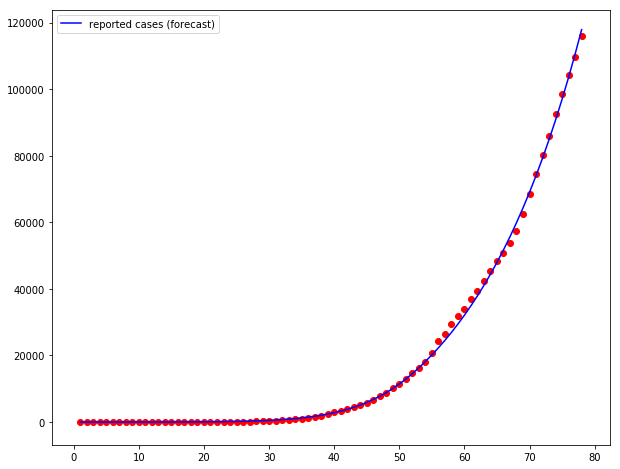

In [123]:
plt.plot(range(1, len(cases) + 1), forecast_cases[:len(cases)], color='blue', label='reported cases (forecast)')
for i in range(len(cases)):
    plt.scatter(i + 1, cases[i], color='red')
plt.legend(loc=0)
plt.show()

In [124]:
forecast_cases[-7:]

[125676.02577986478,
 133900.79712688836,
 142591.37032826056,
 151772.47161080485,
 161469.93542076793,
 171710.72983060384,
 182522.97929401443]

In [106]:
# вот наш прогноз на ближайшую неделю! (начиная с 12 мая)